#### Importing required Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#### Loading the Data Set

In [2]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\data_sets\\Loan_Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Checking shape of data

In [3]:
df.shape

(614, 13)

#### Drpping the irrelevant columns

In [4]:
df.drop(columns=["Loan_ID"],inplace=True)

#### checking missing values

<AxesSubplot:>

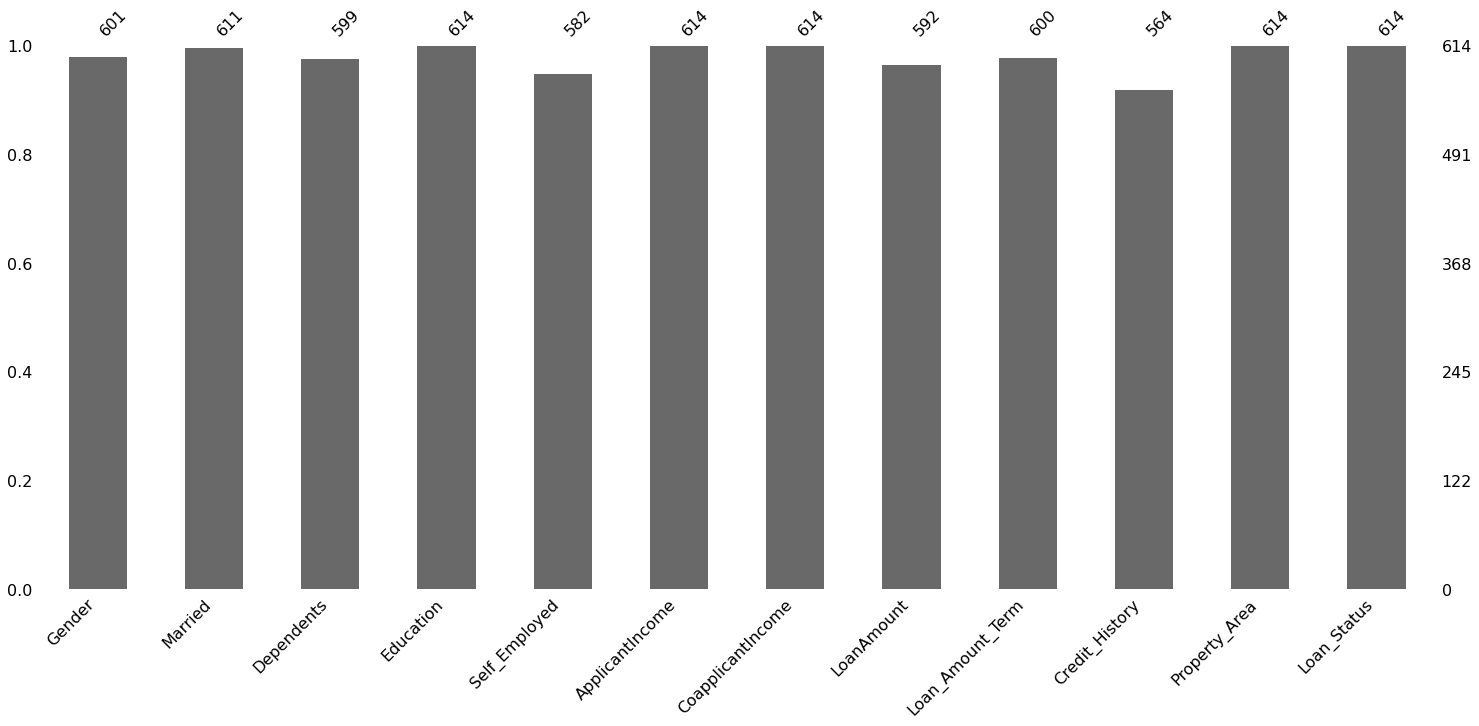

In [5]:
import missingno as msno
msno.bar(df)

In [6]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### Filling the missing values

In [8]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype=="O":
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
            if ((df[i].dtype=="int") or  (df[i].dtype=="float")):
                df[i]=df[i].fillna(df[i].mean())
df.isnull().sum().sum()

0

- No missing values

#### Encoding

In [9]:
for i in df.select_dtypes(include="object").columns:
    print(i,"---------------",df[i].unique())

Gender --------------- ['Male' 'Female']
Married --------------- ['No' 'Yes']
Dependents --------------- ['0' '1' '2' '3+']
Education --------------- ['Graduate' 'Not Graduate']
Self_Employed --------------- ['No' 'Yes']
Property_Area --------------- ['Urban' 'Rural' 'Semiurban']
Loan_Status --------------- ['Y' 'N']


In [10]:
df["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)

#### Seggregate X and Y

In [11]:
x=df.drop(columns="Loan_Status")
y=df["Loan_Status"]

In [12]:
[i for i in df.columns if df[i].dtype=="O" ]

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [13]:
df1=pd.get_dummies(columns=[i for i in df.columns if df[i].dtype=="O" ],drop_first=True,data=df)
df1

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,3,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1,1


In [14]:
x=df1.copy()
x   ##remove Loan_Status_Y

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,1
610,3,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1,1


#### Checking class imbalance

In [15]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- No class imbalance

#### Dividing the data set into train and test

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1200)

#### Getting shape of train and test Data

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(460, 13)
(460,)
(154, 13)
(154,)


In [18]:
abc=AdaBoostClassifier() 
abc.fit(x_train,y_train)

AdaBoostClassifier()

#### Prediction

In [19]:
y_pred=abc.predict(x_test)

#### Accuracy on Test

In [20]:
acc=accuracy_score(y_test,y_pred)
acc

1.0

#### Confusion Matrix

In [21]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[56,  0],
       [ 0, 98]], dtype=int64)

#### F1 Score

In [22]:
f1=f1_score(y_test,y_pred,average="weighted")
f1

1.0

#### Accuracy on training

In [23]:
y_pred_train=abc.predict(x_train)

In [24]:
accuracy_score(y_train,y_pred_train)

1.0

In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
abc_lr=AdaBoostClassifier(base_estimator=lr) 
abc_lr.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [27]:
y_pred_lr=abc_lr.predict(x_test)
y_pred_lr_t=abc_lr.predict(x_train)

#### Accuracy score on lr test

In [28]:
accuracy_score(y_test,y_pred_lr)

0.9935064935064936

#### Accuracy score on lr train

In [29]:
accuracy_score(y_train,y_pred_lr_t)

0.9978260869565218

- same accuracy on train and test, Overfitting

####  hyperparameter Tuning

#### Seeing combination of hyperparameters by grid_search

In [30]:

grid_param = {
    'n_estimators': [10,50,100,500,200],
    'learning_rate' : [0.0001,0.01,0.001,1.0]
   }

In [31]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),
                     param_grid=grid_param,
                    n_jobs =-1,cv=10,scoring="accuracy") 


In [32]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.001, 1.0],
                         'n_estimators': [10, 50, 100, 500, 200]},
             scoring='accuracy')

In [33]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'learning_rate': 0.0001, 'n_estimators': 10}


In [34]:
grid_search.best_score_  ## accuracy on training

1.0

In [35]:
treemodel = AdaBoostClassifier(**best_parameters)                           

In [36]:
treemodel.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)

In [37]:
y_pred=treemodel.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

1.0